In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [2]:
df = pd.read_csv("/content/transactions_train.csv")

In [3]:
df.head()

,transaction_amount,transaction_date,transaction_channel,is_fraud,transaction_payment_mode_anonymous,payment_gateway_bank_anonymous,payer_browser_anonymous,payer_email_anonymous,payee_ip_anonymous,payer_mobile_anonymous,transaction_id_anonymous,payee_id_anonymous
0,3606.0,2024-11-01 00:00:06,w,0,10,0,2993,ed340a2dbe10dda41f6f3d13062d039cb879008fc2106f...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,NaN,ANON_0,ANON_0
1,599.0,2024-11-01 00:00:08,mobile,0,10,6,3563,6cf63ef7f4782059aa490765be32afeb1b9e87cd093bca...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX180.0,ANON_1,ANON_1
2,30.0,2024-11-01 00:00:12,w,0,10,0,2454,ed340a2dbe10dda41f6f3d13062d039cb879008fc2106f...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,NaN,ANON_2,ANON_0
3,99.0,2024-11-01 00:00:34,mobile,0,11,0,1023,33946b46bf9e7d45468661551a1d810e3051b9a9fb935a...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX653.0,ANON_3,ANON_2
4,299.0,2024-11-01 00:01:23,mobile,0,11,0,3683,8aa13ceb67f69868b3ab8cf2d75b7336413e64237ba858...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX353.0,ANON_4,ANON_1


In [4]:
df.dtypes

,0
transaction_amount,float64
transaction_date,object
transaction_channel,object
is_fraud,int64
transaction_payment_mode_anonymous,int64
payment_gateway_bank_anonymous,int64
payer_browser_anonymous,int64
payer_email_anonymous,object
payee_ip_anonymous,object
payer_mobile_anonymous,object


In [5]:
df.isnull().sum()

,0
transaction_amount,72
transaction_date,0
transaction_channel,0
is_fraud,0
transaction_payment_mode_anonymous,0
payment_gateway_bank_anonymous,0
payer_browser_anonymous,0
payer_email_anonymous,15
payee_ip_anonymous,0
payer_mobile_anonymous,104315


In [6]:
df_fraud = df[df['is_fraud'] ==1]
df_valid = df[df['is_fraud'] ==0]

In [7]:
df_fraud

,transaction_amount,transaction_date,transaction_channel,is_fraud,transaction_payment_mode_anonymous,payment_gateway_bank_anonymous,payer_browser_anonymous,payer_email_anonymous,payee_ip_anonymous,payer_mobile_anonymous,transaction_id_anonymous,payee_id_anonymous
9629,2500.0,2024-11-01 16:08:12,mobile,1,10,6,1833,59d6b6631c5d1d78f9a95bbb5a6eea9af7dcadfaec526e...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX355.0,ANON_9629,ANON_47
9764,799.0,2024-11-01 16:15:12,mobile,1,10,6,1833,59d6b6631c5d1d78f9a95bbb5a6eea9af7dcadfaec526e...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX355.0,ANON_9764,ANON_47
27514,9338.0,2024-11-02 14:43:43,mobile,1,2,6,2766,e328fa76459a3035fa6de22fc37050e56f8215b2c5885b...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX871.0,ANON_27514,ANON_265
41176,11749.0,2024-11-03 11:14:07,mobile,1,6,58,3378,9825cbfd00d1ad61d9c16bcc2f6b55b70ab788db08ec0b...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX791.0,ANON_41176,ANON_8
66597,8999.0,2024-11-04 12:54:07,mobile,1,2,6,2766,75788c14ad5afec4a37148c534c48d0003f801d9938420...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX810.0,ANON_66597,ANON_265
134329,1500.0,2024-11-06 08:36:20,W,1,10,6,3212,a8da55af67bc2d875e9fb7b0e887a3eb6e7d2ec5dc6171...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX562.0,ANON_134329,ANON_12
134618,3000.0,2024-11-06 08:56:48,W,1,10,6,3212,a8da55af67bc2d875e9fb7b0e887a3eb6e7d2ec5dc6171...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX562.0,ANON_134618,ANON_12
134815,4000.0,2024-11-06 09:08:18,W,1,10,6,3212,a8da55af67bc2d875e9fb7b0e887a3eb6e7d2ec5dc6171...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX562.0,ANON_134815,ANON_12
135218,300.0,2024-11-06 09:29:49,W,1,10,6,3212,a8da55af67bc2d875e9fb7b0e887a3eb6e7d2ec5dc6171...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX562.0,ANON_135218,ANON_12
147464,5000.0,2024-11-06 13:05:41,W,1,10,6,3212,4f33f46253ffbc087fc4005ec3d95e15ab5933b6c3825f...,773220d255be3b46b7bacc6ef9bc3174aeb7fa96208096...,XXXXX562.0,ANON_147464,ANON_12


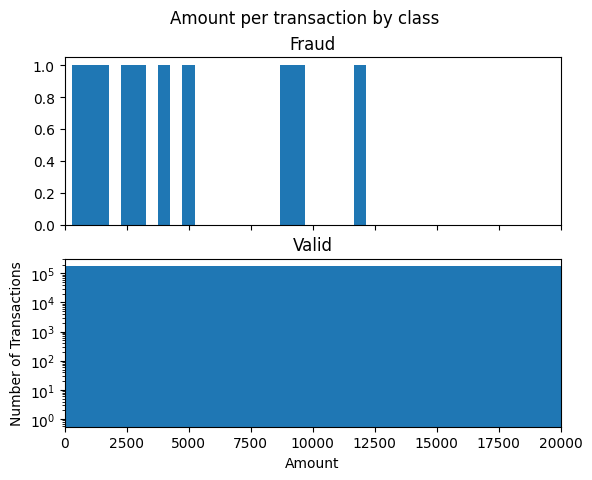

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(df_fraud.transaction_amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(df_valid.transaction_amount, bins = bins)
ax2.set_title('Valid')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

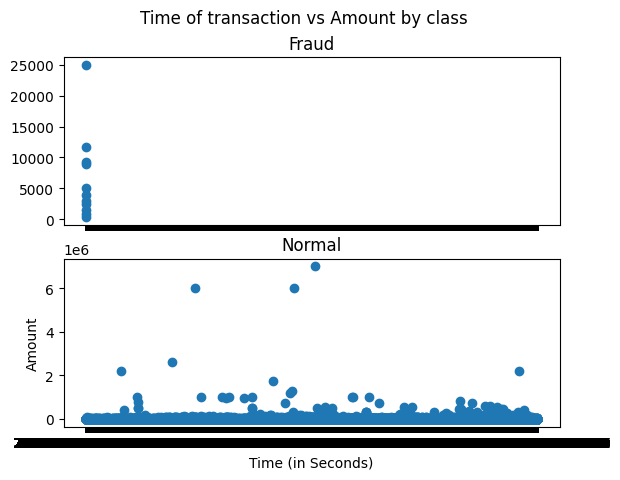

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df_fraud.transaction_date, df_fraud.transaction_amount)
ax1.set_title('Fraud')
ax2.scatter(df_valid.transaction_date, df_valid.transaction_amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [10]:
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

KeyError: "['Class'] not found in axis"

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
outlier_fraction = len(df_fraud)/float(len(df_valid))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
iso_forest.fit(X_train)
y_pred = iso_forest.predict(X_test)

# Convert predictions to match class labels (0 for valid, 1 for fraud)
y_pred = np.where(y_pred == 1, 0, 1)  # Convert 1 → 0 (valid) & -1 → 1 (fraud)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Isolation Forest")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Train Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)
y_pred_lof = lof.fit_predict(X_test)  # LOF does not require explicit fitting

# Convert predictions to match class labels (0 for valid, 1 for fraud)
y_pred_lof = np.where(y_pred_lof == 1, 0, 1)  # Convert 1 → 0 (valid) & -1 → 1 (fraud)

# Confusion Matrix
cm_lof = confusion_matrix(y_test, y_pred_lof)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lof, annot=True, fmt="d", cmap="Blues", xticklabels=["Valid", "Fraud"], yticklabels=["Valid", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Local Outlier Factor")
plt.show()

# Classification Report
print("Classification Report (LOF):\n", classification_report(y_test, y_pred_lof))
accuracy = accuracy_score(y_test, y_pred_lof)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
import pickle
model_path = "Isolation_Forest.pkl"
with open(model_path, "wb") as f:
    pickle.dump(iso_forest, f)

print(f"Model saved at: {model_path}")